##### Copyright 2022 The Cirq Developers

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hello Qubit

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/start/start"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/main/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/main/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

Quantum Circuit with Random Noise:
0: ───H───S───X───@───────────M('result')───
                  │           │
1: ───────────────X───Y───T───M─────────────
                              │
2: ───H───×───X───@───────────M─────────────
          │       │           │
3: ───────×───────@───Z───────M─────────────


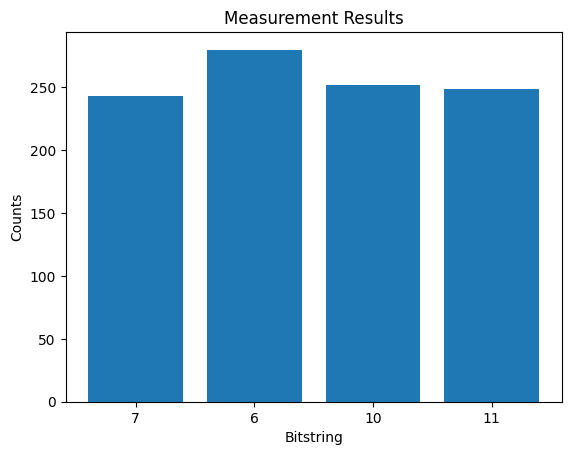

In [25]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

def add_random_noise(circuit, qubit):
    """Adds a random Pauli-X, Y, or Z noise to a specified qubit."""
    noise_gate = np.random.choice([cirq.X, cirq.Y, cirq.Z])
    circuit.append(noise_gate(qubit))

qubits = cirq.LineQubit.range(4)

circuit = cirq.Circuit()

circuit.append([cirq.H(qubits[0]), cirq.S(qubits[0])])
add_random_noise(circuit, qubits[0])

circuit.append(cirq.CNOT(qubits[0], qubits[1]))
add_random_noise(circuit, qubits[1])
circuit.append(cirq.T(qubits[1]))

circuit.append([cirq.H(qubits[2]), cirq.SWAP(qubits[2], qubits[3])])
add_random_noise(circuit, qubits[2])

circuit.append(cirq.CZ(qubits[2], qubits[3]))
add_random_noise(circuit, qubits[3])

circuit.append(cirq.measure(*qubits, key='result'))

print("Quantum Circuit with Random Noise:")
print(circuit)

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1024)

def plot_histogram(result):
    counts = result.histogram(key='result')
    plt.bar([str(k) for k in counts.keys()], counts.values())
    plt.xlabel('Bitstring')
    plt.ylabel('Counts')
    plt.title('Measurement Results')
    plt.show()

plot_histogram(result)


Qubit 0 Bloch vector: (0.0, 0.9999998807907104, 0.0)
Qubit 1 Bloch vector: (0.0, -0.9999997615814209, 0.0)
Qubit 2 Bloch vector: (0.0, -0.9999997615814209, 0.0)
Qubit 3 Bloch vector: (0.0, -0.9999998807907104, 0.0)


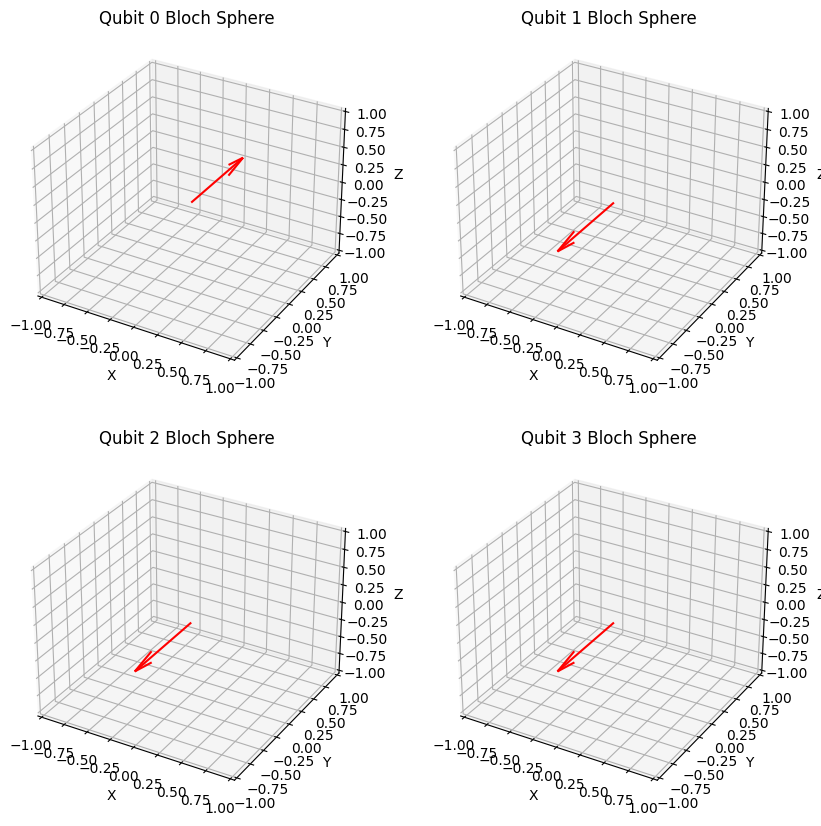

In [24]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def add_random_noise(circuit, qubit):
    """Adds a random Pauli-X, Y, or Z noise to a specified qubit."""
    noise_gate = np.random.choice([cirq.X, cirq.Y, cirq.Z])
    circuit.append(noise_gate(qubit))

def compute_bloch_vector(rho):
    """Computes the Bloch vector components for a given density matrix."""
    pauli_x = np.array([[0, 1], [1, 0]])
    pauli_y = np.array([[0, -1j], [1j, 0]])
    pauli_z = np.array([[1, 0], [0, -1]])

    bloch_x = np.trace(np.dot(pauli_x, rho)).real
    bloch_y = np.trace(np.dot(pauli_y, rho)).real
    bloch_z = np.trace(np.dot(pauli_z, rho)).real

    return bloch_x, bloch_y, bloch_z

def plot_bloch_sphere(ax, bloch_vector, title):
    """Plots a single Bloch vector on a Bloch sphere."""
    bloch_x, bloch_y, bloch_z = bloch_vector
    ax.quiver(0, 0, 0, bloch_x, bloch_y, bloch_z, color='r', arrow_length_ratio=0.3)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

qubits = cirq.LineQubit.range(4)
circuit = cirq.Circuit()

circuit.append([cirq.H(qubits[0]), cirq.S(qubits[0]), cirq.X(qubits[0])])
add_random_noise(circuit, qubits[0])
circuit.append([cirq.H(qubits[1]), cirq.S(qubits[1]), cirq.Y(qubits[1])])
add_random_noise(circuit, qubits[1])
circuit.append([cirq.H(qubits[2]), cirq.S(qubits[2]), cirq.Z(qubits[2])])
add_random_noise(circuit, qubits[2])
circuit.append([cirq.H(qubits[3]), cirq.S(qubits[3]), cirq.X(qubits[3])])
add_random_noise(circuit, qubits[3])


simulator = cirq.Simulator()
result = simulator.simulate(circuit)
state_vector = result.final_state_vector

fig = plt.figure(figsize=(10, 10))

for i, qubit in enumerate(qubits):
    rho_qubit = cirq.density_matrix_from_state_vector(state_vector, [i])

    bloch_vector = compute_bloch_vector(rho_qubit)

    print(f'Qubit {i} Bloch vector: {bloch_vector}')

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    plot_bloch_sphere(ax, bloch_vector, f'Qubit {i} Bloch Sphere')

plt.show()


# Congratulations
You've just run your first Cirq program.

To learn about running a circuit on a virtual machine that mimics existing quantum hardware, see [Quantum Virtual Machine](../simulate/quantum_virtual_machine.ipynb).

If you would like to learn more about quantum computing, check out our [education page](/education). The Full API reference for Cirq can be found [here](/reference/python/cirq). If you are looking for vendor specific information that can be found on our vendor sub-pages:


  [Alpine Quantum Technologies](../hardware/aqt/getting_started.ipynb)
  
  [Pasqal](../hardware/pasqal/getting_started.ipynb)
  
  [IonQ](../hardware/ionq/getting_started.ipynb)
  
  [Azure](../hardware/azure-quantum/getting_started_honeywell.ipynb)
  
  [Rigetti](../hardware/rigetti/getting_started.ipynb)